# **Analyzing the trends of COVID-19**

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Loading**

In [71]:
df = pd.read_csv('covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


**The useful columns are Country/Region, Date, Confirmed, Deaths, Recovered, Active**

**Latitude and Logitude will be useful in case we show it on map**

---
## **EDA**

In [72]:
df.shape

(49068, 10)

In [73]:
df.size

490680

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [75]:
#Changing data type
df['Date'] = pd.to_datetime(df['Date'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [77]:
df.isnull().sum()
# Province is not important, so I will delete it

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [78]:
df.drop(columns=['Province/State'],inplace=True)

In [79]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [80]:
df.duplicated().sum()

0

---
**Outliers**
- In finance data, banking data and census data we don't check outliers
- If there is a value that is extremly high then there is a reason for that, it is a real value, there is no need to remove it


---
**Rename Columns which are too long**

In [82]:
df.rename(columns={"Country/Region":"Country","WHO Region":"Region"},inplace = True)

In [83]:
df.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Region'],
      dtype='object')

In [84]:
df['Country'].nunique()

187

In [85]:
df['Date'].value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

They are not continuos

---
**When did data collection start and end?**

In [86]:
# When did data collection start and end?
print(f"Start of Data Collection : {df['Date'].min()}")
print(f"End of Data Collection   : {df['Date'].max()}")

Start of Data Collection : 2020-01-22 00:00:00
End of Data Collection   : 2020-07-27 00:00:00


---
**Grouping data by country name**

In [87]:
# Grouping data by country name
gouped_by_country = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
gouped_by_country

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


---
**Sort by Confirmed cases**

In [88]:
print("Country with Highest Confirmed cases")
gouped_by_country.sort_values(by='Confirmed',ascending=False)

Country with Highest Confirmed cases


,Country,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
...,...,...,...,...,...
140,Saint Kitts and Nevis,1772,0,1295,477
68,Greenland,1507,0,1372,135
75,Holy See,1356,0,742,614
130,Papua New Guinea,1185,2,695,488


---
**Data Visualisation - Line Plot**

- Visualize the data for **trend of confirmed cases** of countries with date column

In [98]:
confirmed_date = df.groupby(by="Date")["Confirmed"].sum().reset_index()
confirmed_date.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [99]:
confirmed_date.shape

(188, 2)

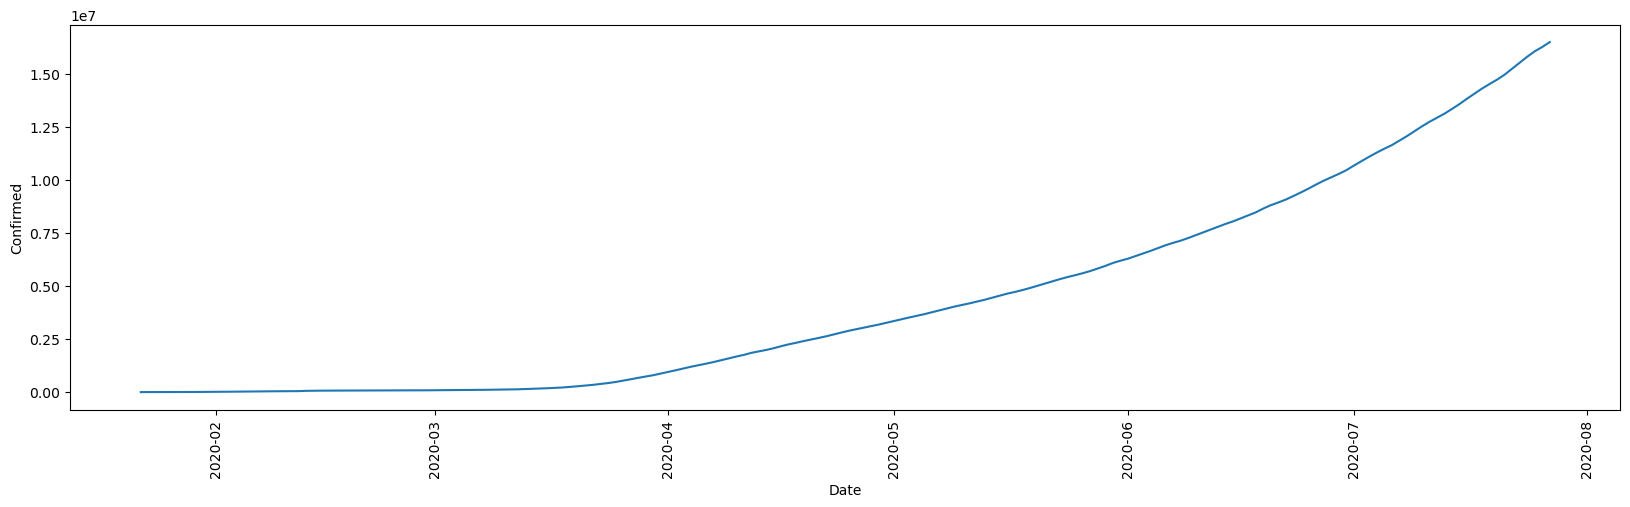

In [106]:
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed_date, x="Date", y="Confirmed")
plt.xticks(rotation=90)
plt.show()

---
- Visualize the data for **trend of Deaths** in countries with date column

In [107]:
deaths = df.groupby(by="Date")["Deaths"].sum().reset_index()
deaths.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [108]:
deaths.shape

(188, 2)

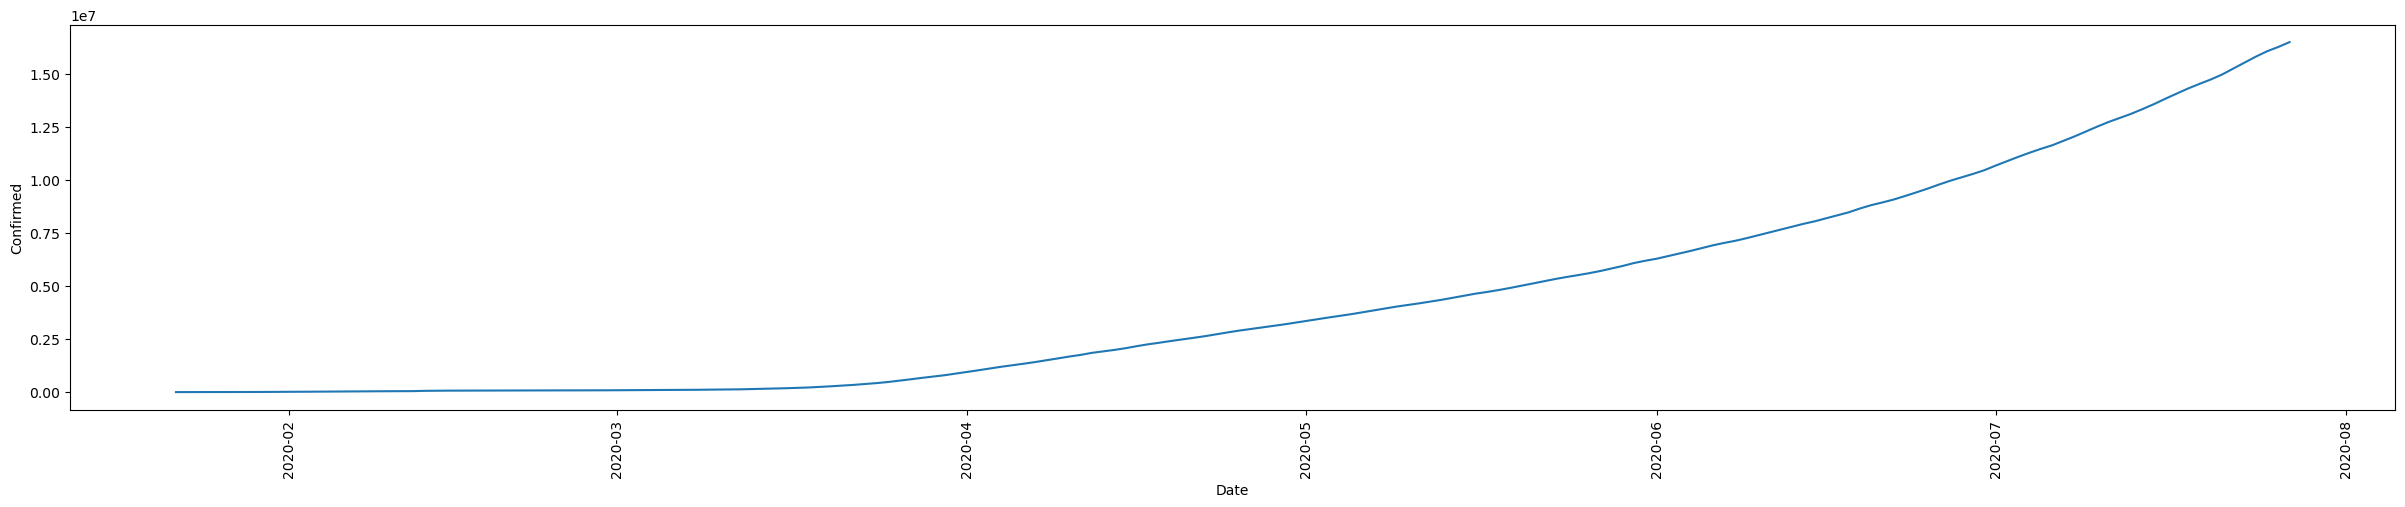

In [103]:
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed_date, x="Date", y="Confirmed")
plt.xticks(rotation=90)
plt.show()

---
- **Top 10 countries with most Confirmed cases**

In [143]:
confirms = df.groupby(by='Country')["Confirmed"].sum().sort_values(ascending =False).head(10).reset_index()
confirms

,Country,Confirmed
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
5,United Kingdom,26748587
6,Italy,26745145
7,France,21210926
8,Germany,21059152
9,Iran,19339267


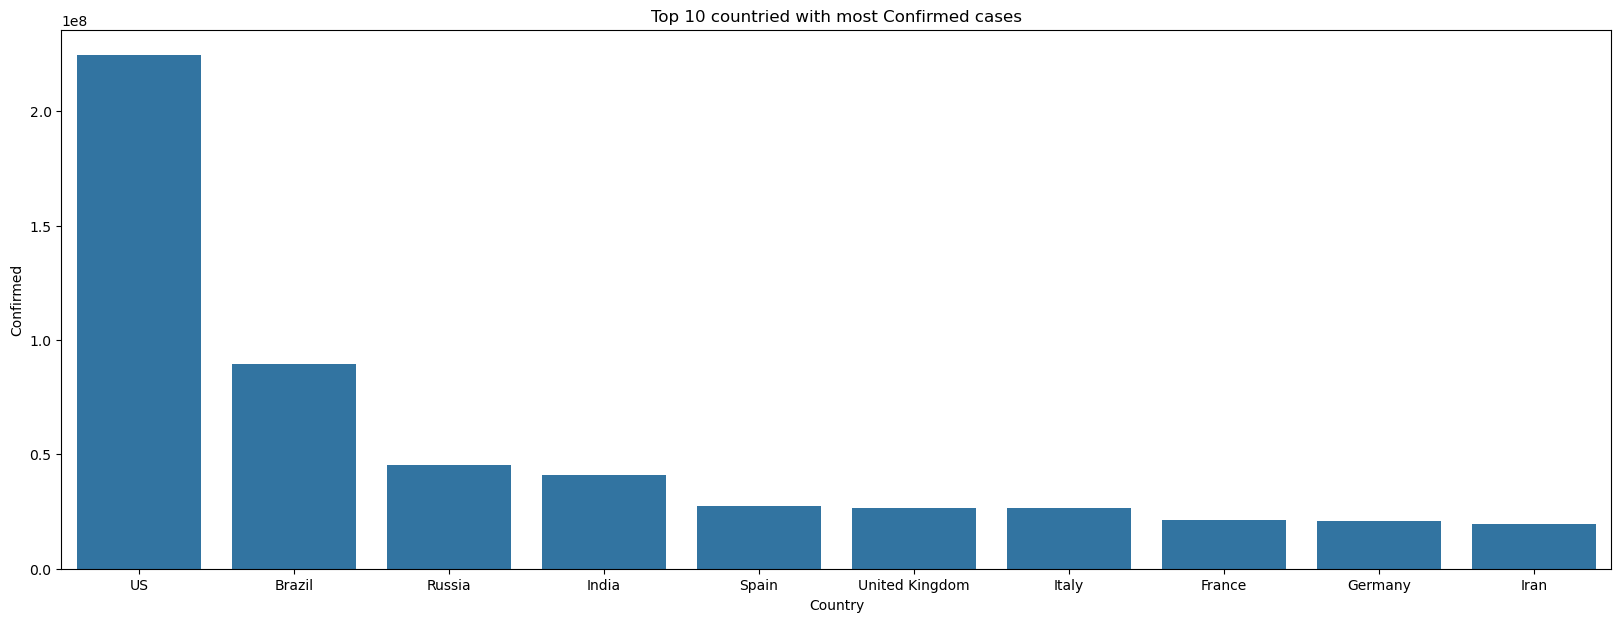

In [149]:
plt.figure(figsize=(20,7))
sns.barplot(data = confirms , x="Country", y ="Confirmed")
plt.title("Top 10 countried with most Confirmed cases")
plt.show()

---
- **Top 10 contries with most Death Cases**

In [145]:
deaths = df.groupby(by='Country')["Deaths"].sum().sort_values(ascending =False).head(10).reset_index()
deaths

,Country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


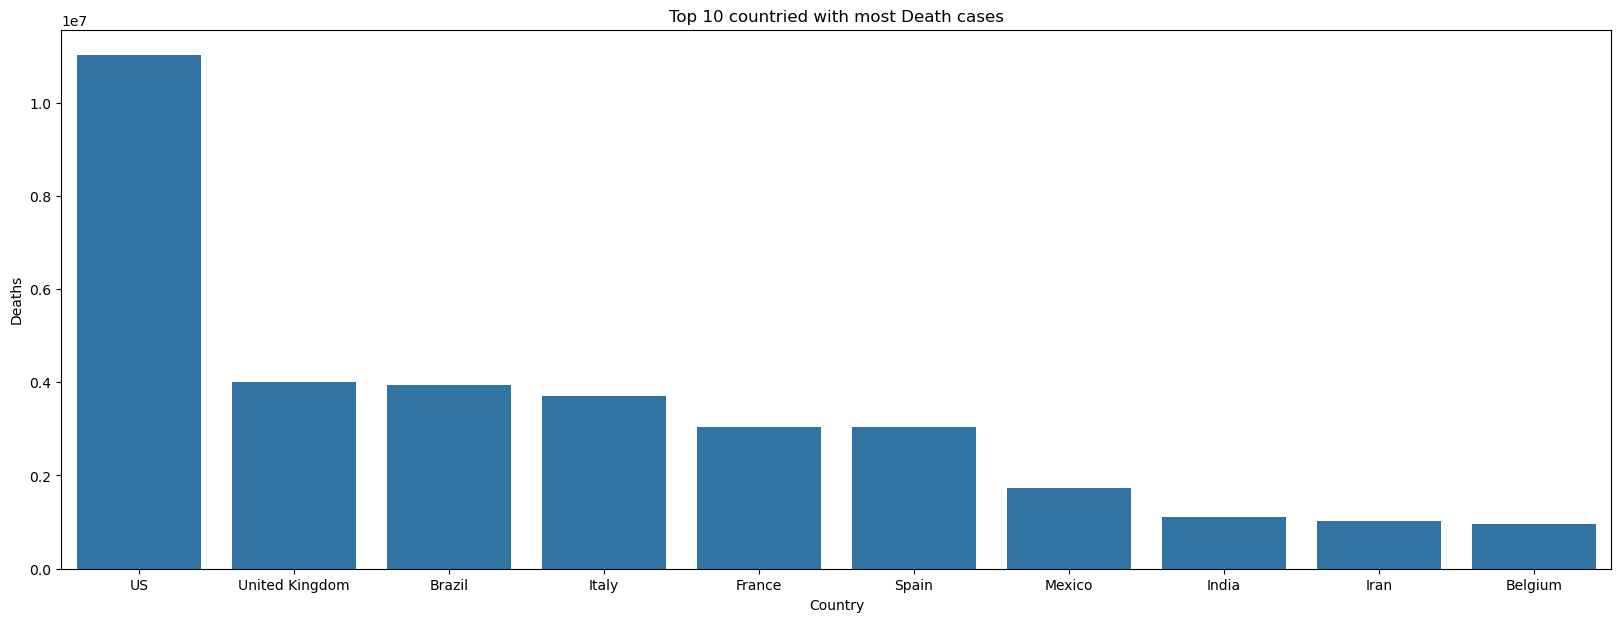

In [146]:
plt.figure(figsize=(20,7))
sns.barplot(data = deaths , x="Country", y ="Deaths")
plt.title("Top 10 countried with most Death cases")
plt.show()

---
- **Top 10 countries with the most Recovered Cases**

In [111]:
recovery = df.groupby(by='Country')["Recovered"].sum().sort_values(ascending = False).head(10).reset_index()
recovery

,Country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


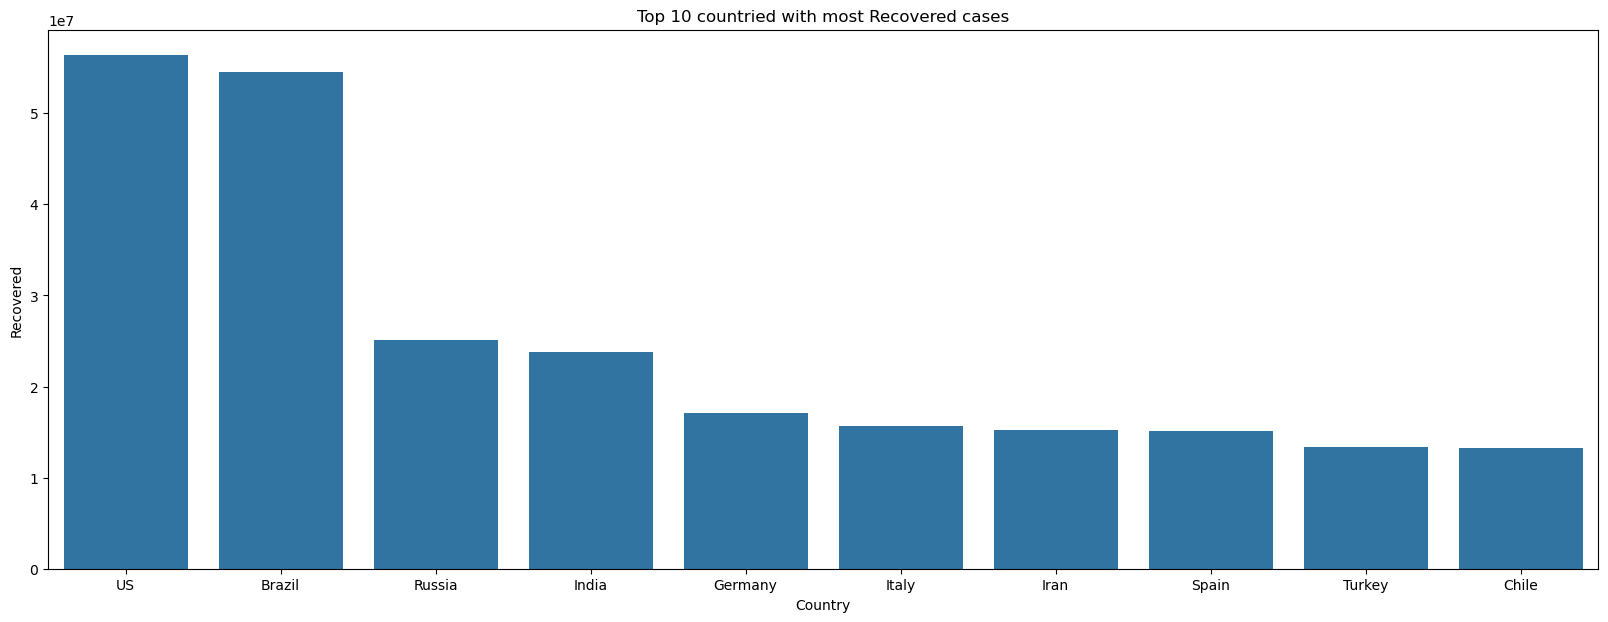

In [112]:
plt.figure(figsize=(20,7))
sns.barplot(data = recovery , x="Country", y ="Recovered")
plt.title("Top 10 countried with most Recovered cases")
plt.show()

---
- **Top 10 countries with the most Active Cases**

In [113]:
active = df.groupby(by='Country')["Active"].sum().sort_values(ascending = False).head(10).reset_index()
active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


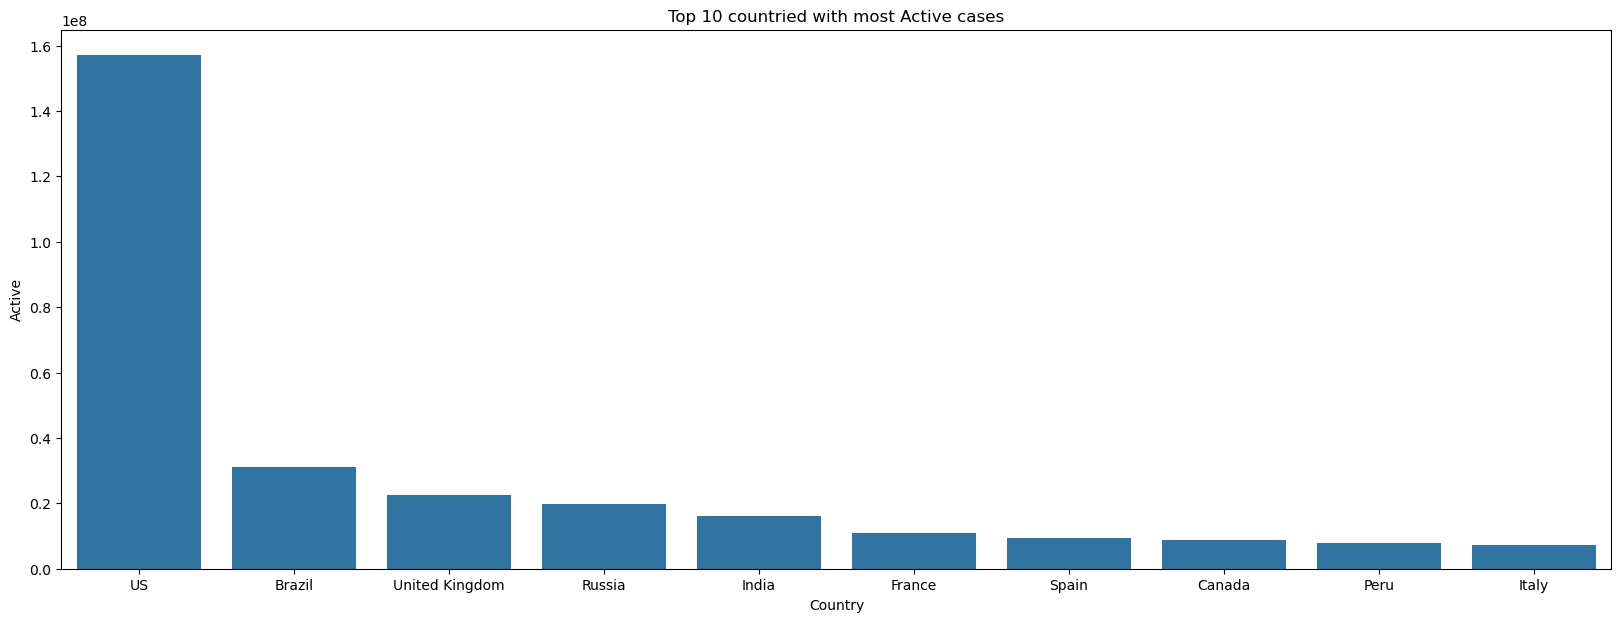

In [115]:
plt.figure(figsize=(20,7))
sns.barplot(data = active , x="Country", y ="Active")
plt.title("Top 10 countried with most Active cases")
plt.show()

---
**Country Based Analysis**

- **Create a US Dataset to compare its confirmed, Death, Recoverd, Active, Region**

In [116]:
US =df[df["Country"]=="US"]
US

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
223,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...
47986,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [119]:
US = US.groupby(by="Date")[["Recovered", "Deaths", "Confirmed", "Active"]].sum().reset_index()
print(US.to_string())

          Date  Recovered  Deaths  Confirmed   Active
0   2020-01-22          0       0          1        1
1   2020-01-23          0       0          1        1
2   2020-01-24          0       0          2        2
3   2020-01-25          0       0          2        2
4   2020-01-26          0       0          5        5
5   2020-01-27          0       0          5        5
6   2020-01-28          0       0          5        5
7   2020-01-29          0       0          5        5
8   2020-01-30          0       0          5        5
9   2020-01-31          0       0          7        7
10  2020-02-01          0       0          8        8
11  2020-02-02          0       0          8        8
12  2020-02-03          0       0         11       11
13  2020-02-04          0       0         11       11
14  2020-02-05          0       0         11       11
15  2020-02-06          0       0         11       11
16  2020-02-07          0       0         11       11
17  2020-02-08          0   

---
- **Create a India Dataset to compare its confirmed, Death, Recoverd, Active, Region**

In [120]:
India =df[df["Country"]=="India"]
India

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
129,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...
47892,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [122]:
India = India.groupby(by="Date")[["Recovered", "Deaths", "Confirmed", "Active"]].sum().reset_index()
print(India.to_string())

          Date  Recovered  Deaths  Confirmed  Active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
5   2020-01-27          0       0          0       0
6   2020-01-28          0       0          0       0
7   2020-01-29          0       0          0       0
8   2020-01-30          0       0          1       1
9   2020-01-31          0       0          1       1
10  2020-02-01          0       0          1       1
11  2020-02-02          0       0          2       2
12  2020-02-03          0       0          3       3
13  2020-02-04          0       0          3       3
14  2020-02-05          0       0          3       3
15  2020-02-06          0       0          3       3
16  2020-02-07          0       0          3       3
17  2020-02-08          0       0          3  

---
- **Create a China Dataset to compare its confirmed, Death, Recoverd, Active, Region**

In [123]:
China =df[df["Country"]=="China"]
China

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
48,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...
48883,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [124]:
China = China.groupby(by="Date")[["Recovered", "Deaths", "Confirmed", "Active"]].sum().reset_index()
print(China.to_string())

          Date  Recovered  Deaths  Confirmed  Active
0   2020-01-22         28      17        548     503
1   2020-01-23         30      18        643     595
2   2020-01-24         36      26        920     858
3   2020-01-25         39      42       1406    1325
4   2020-01-26         49      56       2075    1970
5   2020-01-27         58      82       2877    2737
6   2020-01-28        101     131       5509    5277
7   2020-01-29        119     133       6087    5835
8   2020-01-30        133     171       8141    7837
9   2020-01-31        211     213       9802    9378
10  2020-02-01        272     259      11891   11360
11  2020-02-02        450     361      16630   15819
12  2020-02-03        595     425      19716   18696
13  2020-02-04        812     491      23707   22404
14  2020-02-05       1062     563      27440   25815
15  2020-02-06       1408     633      30587   28546
16  2020-02-07       1891     718      34110   31501
17  2020-02-08       2450     805      36814  

---
**Compare these countries based on Recovered Cases**

<Axes: xlabel='None', ylabel='Recovered'>

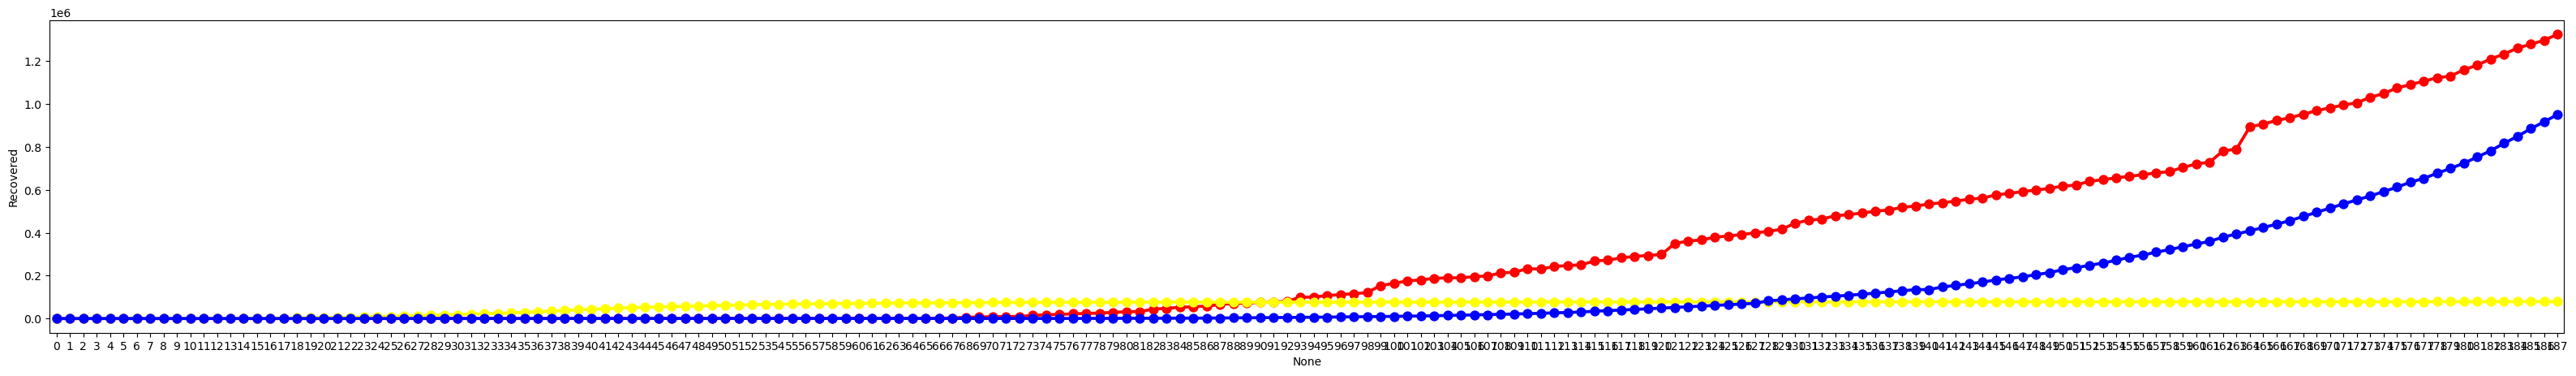

In [129]:
plt.figure(figsize=(40,5))
sns.pointplot(x=US.index, y = US.Recovered, color="Red")
sns.pointplot(x=China.index, y = China.Recovered, color="Yellow")
sns.pointplot(x=India.index, y = India.Recovered, color="Blue")

## **Model Building**

**Intalling prophet**

In [130]:
!pip install prophet

'''
Prophet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range
of time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes
important dates or events that can impact the forecast.
'''

Defaulting to user installation because normal site-packages is not writeable


'\nProphet is a time series forecasting tool developed by Facebook that’s designed to be easy to use and effective for a wide range\nof time series data. It’s particularly useful for data that has strong seasonal effects (like daily or weekly patterns) and includes\nimportant dates or events that can impact the forecast.\n'

In [170]:
df1=pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])
df1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.94,67.71,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15,20.17,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03,1.66,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.51,1.52,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20,17.87,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.19,6.61,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.55,48.52,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.65,43.33,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.86,71.28,2020-07-27,7235,60,6028,1147,Europe


In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


**First apply the model on Confirmed cases**

In [172]:
confirmed = df1.groupby(by="Date").sum()["Confirmed"].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


**Renaming the columns dates and confirmed to df and y**

In [173]:
confirmed.columns=["ds","y"]
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


**Importing and fitting prophet model**

In [174]:
from prophet import Prophet
m = Prophet()

In [175]:
m.fit(confirmed)

14:48:31 - cmdstanpy - INFO - Chain [1] start processing
14:48:31 - cmdstanpy - INFO - Chain [1] done processing


**Making forecasting**

In [176]:
future_forecasted = m.make_future_dataframe(periods=20)  # Defining the period for which you need to do dofrecastig
forecast = m.predict(future_forecasted) # Using , predict for forecasting
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9356.19,-131116.05,86968.72,-9356.19,-9356.19,-10986.21,-10986.21,-10986.21,-10986.21,-10986.21,-10986.21,0.00,0.00,0.00,-20342.40
1,2020-01-23,-6667.73,-110999.25,99010.45,-6667.73,-6667.73,-1078.89,-1078.89,-1078.89,-1078.89,-1078.89,-1078.89,0.00,0.00,0.00,-7746.63
2,2020-01-24,-3979.28,-93499.46,117743.72,-3979.28,-3979.28,10103.25,10103.25,10103.25,10103.25,10103.25,10103.25,0.00,0.00,0.00,6123.97
3,2020-01-25,-1290.83,-93135.98,118970.23,-1290.83,-1290.83,13670.21,13670.21,13670.21,13670.21,13670.21,13670.21,0.00,0.00,0.00,12379.38
4,2020-01-26,1397.62,-94344.10,119712.95,1397.62,1397.62,7218.14,7218.14,7218.14,7218.14,7218.14,7218.14,0.00,0.00,0.00,8615.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2020-08-12,19404411.99,19171316.67,19586201.37,19217751.42,19571105.06,-10986.21,-10986.21,-10986.21,-10986.21,-10986.21,-10986.21,0.00,0.00,0.00,19393425.78
204,2020-08-13,19608653.13,19374114.09,19832120.09,19404529.30,19794257.41,-1078.89,-1078.89,-1078.89,-1078.89,-1078.89,-1078.89,0.00,0.00,0.00,19607574.24
205,2020-08-14,19812894.28,19584102.70,20050266.17,19591387.76,20013939.77,10103.25,10103.25,10103.25,10103.25,10103.25,10103.25,0.00,0.00,0.00,19822997.53
206,2020-08-15,20017135.42,19785674.72,20279337.76,19781730.01,20235001.03,13670.21,13670.21,13670.21,13670.21,13670.21,13670.21,0.00,0.00,0.00,20030805.64


1. **`yhat`** – This is the predicted value for that date (the model’s forecast).  
2. **`yhat_lower`** – The lower bound of the confidence interval (e.g., 95% confidence interval). It represents the lowest expected value.  
3. **`yhat_upper`** – The upper bound of the confidence interval. It represents the highest expected value within the confidence range.  

- **`yhat`** gives the most probable forecasted value.  
- **`yhat_lower` and `yhat_upper`** help understand the **uncertainty** in predictions. If the confidence interval is wide, the forecast has high variability.  



# **Plotting The Forecast**

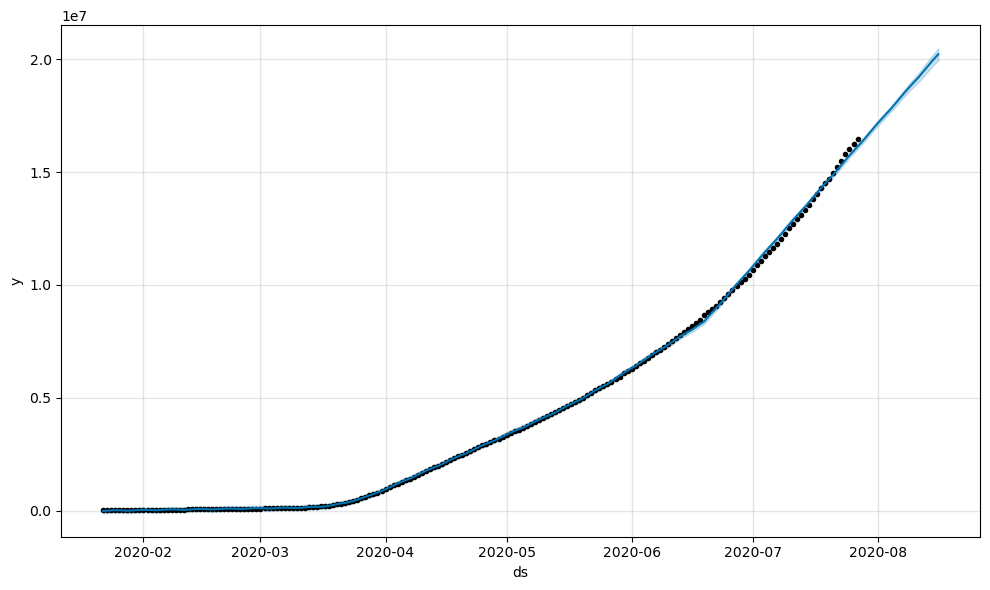

In [177]:
m.plot(forecast)
plt.show()

---
**Renaming the column names for better understanding**

In [178]:
forecast = forecast[['ds','yhat','yhat_upper','yhat_lower']]
forecast = forecast.rename(columns={'ds': 'Date', 'yhat_lower': 'Lower Bound', 
                                                    'yhat_upper': 'Upper Bound', 'yhat': 'Predicted Deaths'})

In [179]:
pd.set_option('display.float_format', '{:.2f}'.format)

forecast

,Date,Predicted Deaths,Upper Bound,Lower Bound
0,2020-01-22,-20342.40,86968.72,-131116.05
1,2020-01-23,-7746.63,99010.45,-110999.25
2,2020-01-24,6123.97,117743.72,-93499.46
3,2020-01-25,12379.38,118970.23,-93135.98
4,2020-01-26,8615.77,119712.95,-94344.10
...,...,...,...,...
203,2020-08-12,19393425.78,19586201.37,19171316.67
204,2020-08-13,19607574.24,19832120.09,19374114.09
205,2020-08-14,19822997.53,20050266.17,19584102.70
206,2020-08-15,20030805.64,20279337.76,19785674.72


---
**Ploting with plotly**

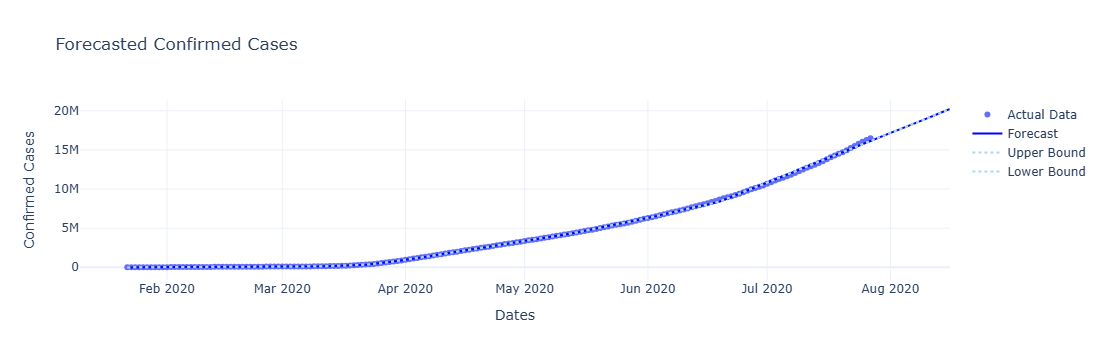

In [185]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add actual data points
fig.add_trace(go.Scatter(x=confirmed['ds'], y=confirmed['y'], 
                         mode='markers', 
                         name='Actual Data'))

# Add forecasted trend
fig.add_trace(go.Scatter(x=forecast['Date'], y=forecast['Predicted Deaths'], 
                         mode='lines', 
                         name='Forecast', 
                         line=dict(color='blue')))

# Add upper and lower uncertainty bounds
fig.add_trace(go.Scatter(x=forecast['Date'], y=forecast['Predicted Deaths'], 
                         mode='lines', 
                         name='Upper Bound', 
                         line=dict(dash='dot', color='lightblue')))
fig.add_trace(go.Scatter(x=forecast['Date'], y=forecast['Predicted Deaths'], 
                         mode='lines', 
                         name='Lower Bound', 
                         line=dict(dash='dot', color='lightblue')))

# Layout settings
fig.update_layout(title="Forecasted Confirmed Cases",
                  xaxis_title="Dates",
                  yaxis_title="Confirmed Cases",
                  template="plotly_white")

# Show figure
fig.show()
